In [1]:
# Datasets can be downloaded here:
# https://perso.univ-rennes1.fr/valerie.monbet/MachineLearning/TCGA-PANCAN-HiSeq-801df20531/data.csv
# https://perso.univ-rennes1.fr/valerie.monbet/MachineLearning/TCGA-PANCAN-HiSeq-801df20531/labels.csv
from re import L
import pandas as pd
import numpy as np

etudiant = 22109084 # nombre à  remplacer par votre numéro d'etudiant
np.random.seed(etudiant)

# First line is read to get the number of columns
# df = np.loadtdft(dataset,madf_rows=1,delimiter=",",dtype=str)
df = pd.read_csv("data.csv", nrows=200 ,delimiter=",",dtype=str)
# Printing Number of columns
print('Number of columns :', df.shape[1])
print('Number of rows :', df.shape[0])

# Dropping eventual NAs
df.dropna(axis=1)

#dropping index
df.drop(df.columns[0], axis='columns', inplace=True)

# converting to float
df = df.astype(float)

#Importing labels
labels = pd.read_csv("labels.csv", nrows=200 ,delimiter=",",dtype=str)
labels.drop(labels.columns[0], axis=1, inplace=True)
labels.head()
df = pd.concat([df, labels], axis=1)
df.head()

Number of columns : 20532
Number of rows : 200


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [2]:
# Elimination des variables constantes
df_cl = df.drop('Class', axis=1)
df_cl = df_cl[df_cl.std(axis='columns') > 1e-8]
df_cl

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,2.882565,1.817787,5.974724,8.984794,0.0,8.738390,1.078951,0.0,0.0,...,6.500745,9.216930,10.534702,5.892544,10.107126,11.724326,10.935902,10.270669,9.743269,0.0
196,0.0,0.000000,2.555325,6.949442,10.509231,0.0,8.985623,0.762902,0.0,0.0,...,4.453248,7.464423,9.530750,6.900468,8.413924,12.348626,9.589348,7.864533,3.831918,0.0
197,0.0,5.121915,4.223685,6.263153,9.587266,0.0,7.073435,0.297368,0.0,0.0,...,5.924715,9.212917,9.886663,8.838189,11.088907,10.590830,10.968321,11.077644,2.419350,0.0
198,0.0,0.000000,1.622274,7.604368,10.357442,0.0,5.764221,0.000000,0.0,0.0,...,3.595241,7.886148,9.168381,5.435118,10.462482,11.694175,7.776446,9.496396,1.915138,0.0


##Clustering using k-means algorithm

In [3]:
from sklearn.cluster import  KMeans
from sklearn.metrics import confusion_matrix
from sklearn import mixture
import matplotlib.pyplot as plt

In [4]:
n_clusters = int(df["Class"].nunique())
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
k_means.fit(df_cl)
cl = k_means.labels_ # predicted classes 
print(cl)

c:\Users\antoi\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 2 0 0 4 0 1 0 4 0 4 1 0 4 4 4 2 1 1 0 4 1 2 4 1 2 3 4 4 4 4 4 1 4 0 4 1
 2 4 4 1 0 0 1 1 4 0 3 4 2 4 2 4 0 3 4 4 3 1 4 2 4 4 2 0 3 4 0 1 4 1 4 4 2
 4 2 4 1 0 3 4 0 4 4 0 0 4 4 1 4 0 0 4 4 4 0 3 4 0 4 4 1 4 1 2 1 2 3 2 2 0
 4 2 0 4 1 1 1 4 4 2 1 2 4 0 0 0 4 1 4 3 4 3 4 4 1 2 4 1 3 4 0 4 1 2 3 0 4
 2 2 2 2 4 4 2 4 4 0 0 2 0 2 1 4 0 2 3 1 2 4 1 2 4 2 4 4 4 0 4 1 3 1 4 0 0
 0 2 2 4 2 2 1 2 0 2 4 4 4 2 2]


In [5]:
df['group'] = cl.tolist()
df['pred_class'] = df['Class']
for k in range(n_clusters):
    labels = df[['group', 'Class']]
    labels = labels[labels['group'] == k]
    label = labels['Class'].value_counts().index[0]
    print("Classe "+ str(k)+", label majoritaire = "+ label)
    df.loc[df['group'] == k, 'pred_class'] = label
print(df[['group', 'pred_class', 'Class']])

Classe 0, label majoritaire = PRAD
Classe 1, label majoritaire = KIRC
Classe 2, label majoritaire = LUAD
Classe 3, label majoritaire = COAD
Classe 4, label majoritaire = BRCA
     group pred_class Class
0        0       PRAD  PRAD
1        2       LUAD  LUAD
2        0       PRAD  PRAD
3        0       PRAD  PRAD
4        4       BRCA  BRCA
..     ...        ...   ...
195      4       BRCA  BRCA
196      4       BRCA  BRCA
197      4       BRCA  BRCA
198      2       LUAD  LUAD
199      2       LUAD  LUAD

[200 rows x 3 columns]


In [6]:
conf_mat =  confusion_matrix(df["Class"], df["pred_class"])
print("Confusion Matrix:")
print("   A line = n digit. A column = a cluster\n")
print(conf_mat)

Confusion Matrix:
   A line = n digit. A column = a cluster

[[73  0  0  0  0]
 [ 0 14  0  0  0]
 [ 1  0 33  0  0]
 [ 1  0  0 39  0]
 [ 0  0  0  0 39]]


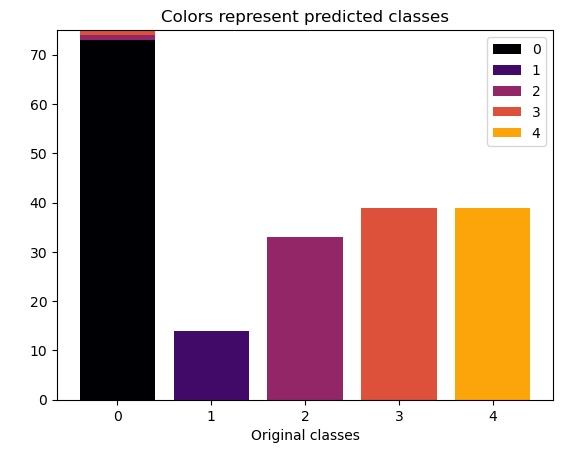

In [7]:
def BarPlotMat(M): 
# Fait un barplot pour chaque colonne de M.
# La couleur correspond à l'indice, la hauteur à la valeur
  I=M.shape[0]
  J=M.shape[1]
  ind = np.arange(J)
  plots = []
  height_cumul = 0
  for i in range(I):
    color = plt.cm.inferno(i/I, 1)
    if k == 0:
      p = plt.bar(ind,M[i,:],width=.35, color=color)
    else:
      p = plt.bar(ind,M[i,:], bottom=height_cumul, color=color)
    height_cumul +=M[i,:]
    plots.append(p)    

BarPlotMat(conf_mat)
plt.xlabel('Original classes')
plt.ylabel(' ')
plt.title('Colors represent predicted classes')
plt.legend(['0','1','2','3','4',])

La classification semble globalement assez bonne, avec une sépration correcte des groupes.

On notera que si la séparation n'était pas aussi tranchée, attribuer une classe à chaque groupe en fonction du nombe de labels prédominant serait beaucoup plus compliqué. Par exemple, si deux groupes déterminés par kmeans contiennent une proportion proche de deux labels (ou plus!), comment attribuer de manière statistiquement fiable le bon label à ce groupe ?.

## Représentation graphique grâce à une technique de réduction de dimension (PCA)

In [8]:
from time import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import manifold

In [9]:
# Standardizing the features
features = df_cl # df_cl is the raw number dataframe without the labels ie. all features.
features = StandardScaler().fit_transform(features)
labels = df['Class'].values

## PCA Projection in 2 dimensions
Since we have 20k+ features, the goal is to project those in two dimensions.
Those dimensions will represent part of the variation between the samples.
We will check further down the line how much of the variation is represented.

In [10]:
pca = PCA(n_components=2)
PC = pca.fit_transform(features)
df_pca = pd.DataFrame(data = PC,
    columns = ['PC1', 'PC2']
    )
df_pca = pd.concat([df_pca, df[['Class']]], axis = 1)

## Visualizing the data
Now that we have the results of the PCA, the next step is to plot the data along the principal components.

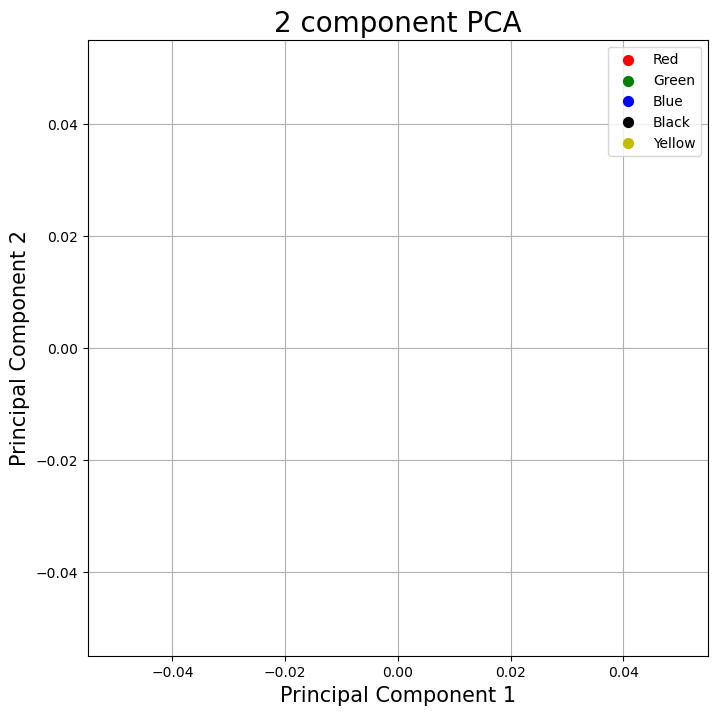

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Red', 'Green', 'Blue', 'Black', 'Yellow']
colors = ['r', 'g', 'b', 'black', 'y']  
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['Class'] == target
    ax.scatter(x = df_pca.loc[indicesToKeep, 'PC1']
               , y = df_pca.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [12]:

color = {'PRAD' : 'blue', 'BRCA' : 'red', 'LUAD' : 'green', 'COAD' : 'yellow', 'KIRC' : 'purple'}
plt.scatter(x=df_pca['PC1'], y=df_pca['PC2'], c=color[df_pca['Class'].to_list()])
plt.show()


TypeError: unhashable type: 'list'

In [14]:
# Plot of the variables

A1 = pca.components_[0,:]
A2 = pca.components_[1,:]
plt.figure()
plt.scatter(A1,A2,c='black',marker="+")
for i, txt in enumerate(df_cl):
    plt.annotate(txt, (A1[i]+.01,A2[i]+.01))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA variables")
plt.grid()

# Plot the eigenvalues
pca = PCA(n_components=features.shape[1])
D = pca.fit_transform(features)
plt.figure() 
plt.title('Pourcentage of explained variance')
plt.bar(np.arange(features.shape[1])+1,pca.explained_variance_ratio_)

ValueError: n_components=20531 must be between 0 and min(n_samples, n_features)=200 with svd_solver='full'

Error in callback <function flush_figures at 0x000002408600DD30> (for post_execute):


KeyboardInterrupt: 

# GMM Clustering

In [ ]:
greatest_bic = -np.infty
bic = []
n_components_ = 5
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    # Fit a Gaussian mixture with EM
    gmm = mixture.GaussianMixture(n_components=n_components_,
                                      covariance_type=cv_type)
    gmm.fit(df_cl)
    bic.append(gmm.bic(df_cl))
    if bic[-1] > greatest_bic:
        greatest_bic = bic[-1]
        best_gmm = gmm